In [8]:
# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import brainpy as bp
import brainpy.math as bm
import seaborn as sns
from scipy import stats
import itertools
from scipy.signal import find_peaks

In [9]:
na_amp = np.load('data/na_amp.npz')
na_isi = np.load('data/na_isi.npz')
na_rest = np.load('data/na_rest.npz')

In [10]:
na_amp_sim = na_amp['sim']
na_amp_exp = na_amp['exp']  

na_isi_sim = na_isi['sim']
na_isi_exp = na_isi['exp']

na_rest_sim = na_rest['sim']
na_rest_exp = na_rest['exp']

In [11]:
data_amp = [na_amp_exp.tolist(), na_amp_sim.tolist()]
labels_amp = ['exp','sim']

data_isi = [na_isi_exp.tolist(), na_isi_sim.tolist()]
labels_isi = ['exp','sim']

data_rest   = [na_rest_exp.tolist(), na_rest_sim.tolist()]
labels_rest = ['exp','sim']

In [12]:
plt_style = {
    'figure.figsize' : (8, 6),
    'figure.autolayout' : True,
    'font.size' : 18,
    'lines.linewidth' : 3,
    'xtick.labelsize' : 24,
    'ytick.labelsize' : 24,
    'legend.fontsize' : 'small',
    'axes.spines.top' : False,
    'axes.spines.right' : False,
    'xtick.major.size' : 6,
    'ytick.major.size' : 6,
    'legend.fontsize' : 14,
    'axes.labelsize' : 24,
    'axes.titlesize' : 24,
    # 'font.family': "Times New Roman"
    }
for key, val in plt_style.items():
    plt.rcParams[key] = val

exp: ${45.66} \pm {1.37}\,\mathrm{mV}$
sim: ${54.20} \pm {0.47}\,\mathrm{mV}$


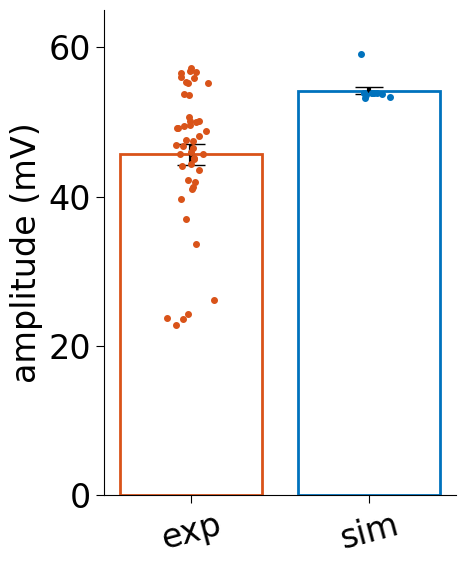

In [13]:
# Calculate means and standard errors
means = [np.mean(d) for d in data_amp]
std_errors = [np.std(d) / np.sqrt(len(d)) for d in data_amp]

# Set colors for the borders of the bars
border_colors = [[0.85,0.325,0.098], [0,0.447,0.741]]

for label, mean, std_err in zip(labels_amp, means, std_errors):
    latex_output = f"{label}: ${{{mean:.2f}}} \\pm {{{std_err:.2f}}}\\,\\mathrm{{mV}}$"
    print(latex_output)

# Create the figure and axis
# fig, ax = plt.subplots(figsize=(4, 6))
fig, ax = plt.subplots(figsize=(5, 6))
# Create bar plot
bars = ax.bar(labels_amp, means, yerr=std_errors, capsize=10, edgecolor=border_colors, color='none', linewidth=2)

# Plot individual data points
for i, d in enumerate(data_amp):
    x = np.random.normal(i, 0.05, size=len(d))  # Adding jitter for better visibility
    ax.plot(x, d, 'o', color=border_colors[i],markersize=4)

# Customize labels and y-axis
ax.set_ylabel('amplitude (mV)')
ax.set_ylim([0, 65])
ax.set_yticks(np.arange(0, 61, 20))
plt.xticks(rotation=15)
# Add significance marker "n.s." (not significant)
# ax.text(1, 0, 'n.s', ha='center', va='center', fontsize=12, color='black')

# Display the plot
plt.tight_layout()
plt.savefig('Figure/na_amp.svg', dpi=300)
plt.show()

exp: ${129.33} \pm {10.30}\,\mathrm{ms}$
sim: ${154.17} \pm {11.01}\,\mathrm{ms}$


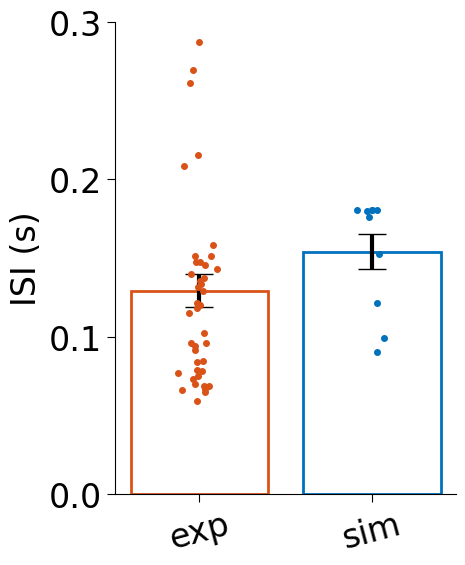

In [14]:
# Calculate means and standard errors
means = [np.mean(d) for d in data_isi]
std_errors = [np.std(d) / np.sqrt(len(d)) for d in data_isi]
for label, mean, std_err in zip(labels_amp, means, std_errors):
    latex_output = f"{label}: ${{{mean*1e3:.2f}}} \\pm {{{std_err*1e3:.2f}}}\\,\\mathrm{{ms}}$"
    print(latex_output)
# Set colors for the borders of the bars

# Create the figure and axis
fig, ax = plt.subplots(figsize=(5, 6))

# Create bar plot
bars = ax.bar(labels_isi, means, yerr=std_errors, capsize=10, edgecolor=border_colors, color='none', linewidth=2)

# Plot individual data points
for i, d in enumerate(data_isi):
    x = np.random.normal(i, 0.05, size=len(d))  # Adding jitter for better visibility
    ax.plot(x, d, 'o', color=border_colors[i], markersize=4)

# Customize labels and y-axis
ax.set_ylabel('ISI (s)')
ax.set_ylim([0, 0.3])
ax.set_yticks(np.arange(0, 0.31, 0.1))
plt.xticks(rotation=15)
# Add significance marker "n.s." (not significant)
# ax.text(1, 0, 'n.s', ha='center', va='center', fontsize=12, color='black')

# Display the plot
plt.tight_layout()
plt.savefig('Figure/na_isi.svg', dpi=300)
plt.show()

exp: ${-50.99} \pm {1.99}\,\mathrm{mV}$
sim: ${-27.69} \pm {0.00}\,\mathrm{mV}$


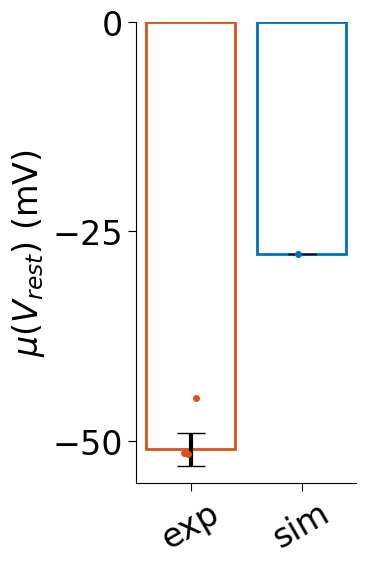

In [15]:
# Calculate means and standard errors
means = [np.mean(d) for d in data_rest]
std_errors = [np.std(d) / np.sqrt(len(d)) if isinstance(d, (list, np.ndarray)) and len(d) > 1 else 0 for d in data_rest]
for label, mean, std_err in zip(labels_amp, means, std_errors):
    latex_output = f"{label}: ${{{mean:.2f}}} \\pm {{{std_err:.2f}}}\\,\\mathrm{{mV}}$"
    print(latex_output)
# Set colors for the borders of the bars
# Create the figure and axis
fig, ax = plt.subplots(figsize=(4, 6))

# Create bar plot
bars = ax.bar(labels_rest, means, yerr=std_errors, capsize=10, edgecolor=border_colors, color='none', linewidth=2)

# Plot individual data points
for i, d in enumerate(data_rest):
    if isinstance(d, (list, np.ndarray)) and len(d) > 1:
        length = len(d)
    else:
        length = 1
    x = np.random.normal(i, 0.05, size=length)  # Adding jitter for better visibility
    ax.plot(x, d, 'o', color=border_colors[i], markersize=4)

# Customize labels and y-axis
ax.set_ylabel('$\mu(V_{rest})$ (mV)')
ax.set_ylim([-55., 0.])
ax.set_yticks(np.arange(-50, 0.1, 25))
plt.xticks(rotation=30)
# Add significance marker "n.s." (not significant)
# ax.text(1, 0, 'n.s', ha='center', va='center', fontsize=12, color='black')

# Display the plot
plt.tight_layout()
plt.savefig('Figure/na_rest.svg', dpi=300)
plt.show()